In [1]:
import numpy as np
import os
from tifffile import imread, imsave

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

from scipy.ndimage.morphology import distance_transform_edt
import itk
import cv2
import myfxns


from aicssegmentation.core.visual import blob2dExplorer_single, random_colormap
from aicssegmentation.core.seg_dot import dot_2d
from aicssegmentation.core.utils import hole_filling
from aicssegmentation.core.pre_processing_utils import intensity_normalization, suggest_normalization_param, edge_preserving_smoothing_3d

#### To function properly you will need to correctly define `DATAPATH` as the top directory containing the example (or full) image datasets.
This may need to change once the data are made available across the instances.

In [2]:
DATAPATH = "./seg-image-subsets"

## load one example image

In [3]:
im_path = os.path.join(DATAPATH,'Vanderbilt_live_cell/17674249.tif')
im_path

'./seg-image-subsets/Vanderbilt_live_cell/17674249.tif'

In [4]:
img = imread(im_path)

In [5]:
img.shape

(2160, 2160)

NOTE: only nuclear channel

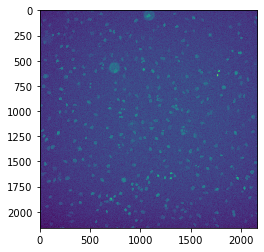

In [6]:
plt.imshow(img)

## NOTE: very weak signal

## pre-processing: intensity normalization and smoothing

In [7]:
suggest_normalization_param(img)

mean intensity of the stack: 637.5514364711934
the standard deviation of intensity of the stack: 86.84765635864345
0.9999 percentile of the stack intensity is: 1428.0
minimum intensity of the stack: 300
maximum intensity of the stack: 2018
suggested upper range is 9.5, which is 1462.6041718783063
suggested lower range is 3.5, which is 333.5846392159413
So, suggested parameter for normalization is [3.5, 9.5]
To further enhance the contrast: You may increase the first value (may loss some dim parts), or decrease the second value(may loss some texture in super bright regions)
To slightly reduce the contrast: You may decrease the first value, or increase the second value


In [8]:
img_norm = intensity_normalization(img, [3.5, 9.5])

intensity normalization: normalize into [mean - 3.5 x std, mean + 9.5 x std] 
intensity normalization completes


In [9]:
img_smooth = edge_preserving_smoothing_3d(img_norm)

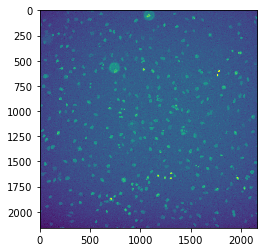

In [10]:
plt.imshow(img_smooth)

## remove large out-of-focus objects
This also makes background more even (applies rolling ball algorithm)

In [11]:
bc_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, myfxns.cmask(20))


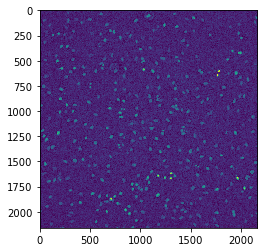

In [12]:
plt.imshow(bc_img)

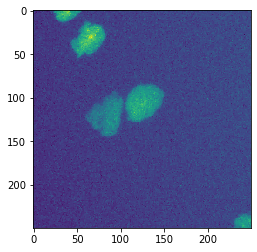

In [13]:
plt.imshow(img_smooth[1250:1500,0:250])

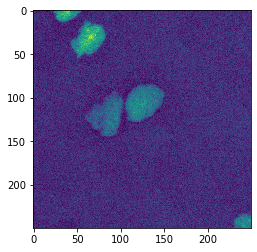

In [14]:
plt.imshow(bc_img[1250:1500,0:250])